In [50]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [24]:
target = oliv.target

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv.data.shape

(400, 4096)

In [5]:
oliv.images.shape 

(400, 64, 64)

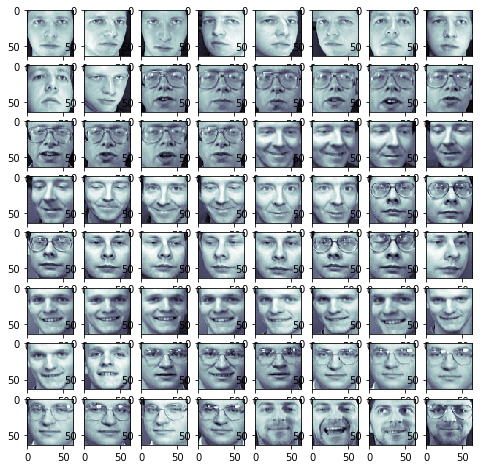

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x = oliv.data
y = oliv.target

In [8]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(400, 4096)

In [10]:
k = 0
total = pca.explained_variance_.sum()
cur_var = 0

while cur_var/total<0.95:
    cur_var += pca.explained_variance_[k]
    k += 1
k

123

In [11]:
pca = PCA(k)
oliv_pca = pca.fit_transform(x)
oliv_pca.shape

(400, 123)

In [12]:
data_pca = pca.inverse_transform(oliv_pca)
data_pca.shape

(400, 4096)

In [13]:
images_pca = data_pca.reshape((400,64,64))

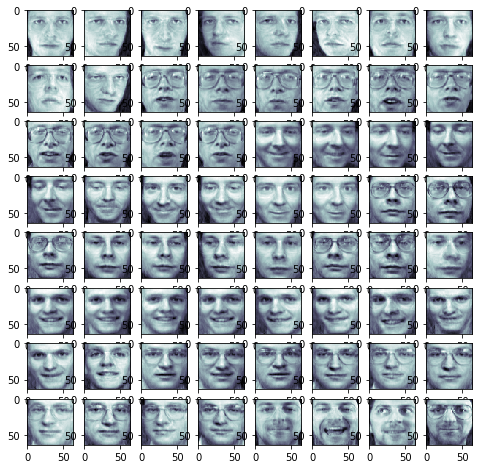

In [14]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_pca[i],cmap=plt.cm.bone)
plt.show()

In [15]:
pca.components_.shape

(123, 4096)

In [16]:
components_images_pca = pca.components_.reshape((123,64,64))

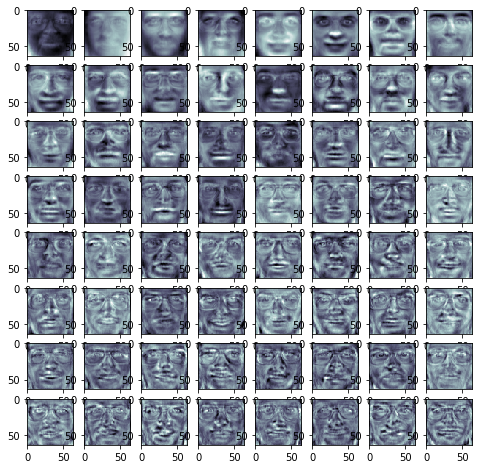

In [18]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(components_images_pca[i],cmap=plt.cm.bone)
plt.show()

In [25]:
oliv_pca.shape

(400, 123)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(oliv_pca,target,random_state=0)

In [34]:
x_train.shape , y_train.shape

((300, 123), (300,))

In [38]:
x_test.shape , y_test.shape

((100, 123), (100,))

## Logistic Regression

In [39]:
alg = LR()
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(cr(y_test,result))
print(cm(y_test,result))

0.98
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         6
          1       1.00      1.00      1.00         4
          2       0.50      1.00      0.67         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       1.00      1.00      1.

## Naive Bayes

In [40]:
alg = GNB()
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(cr(y_test,result))
print(cm(y_test,result))

0.72
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       1.00      0.25      0.40         4
          2       0.50      0.50      0.50         2
          3       0.25      1.00      0.40         1
          4       1.00      1.00      1.00         1
          5       1.00      0.80      0.89         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       0.12      1.00      0.22         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       0.75      1.00      0.86         3
         16       0.00      0.00      0.00         0
         17       1.00      0.17      0.29         6
         19       0.80      1.00      0.

D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## DECISION TREE

In [62]:
grid = {"min_samples_leaf":[1,3,5,10,15] , "max_depth":[1,3,5,10] , "criterion":['gini','entropy']}
clf = DT()
alg = GridSearchCV(clf,grid)
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(alg.best_estimator_)
print(cr(y_test,result))
print(cm(y_test,result))
print(alg.grid_scores_)

0.43
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.33      0.17      0.22         6
          1       0.40      0.50      0.44         4
          2       0.00      0.00      0.00         2
          3       0.17      1.00      0.29         1
          4       0.50      1.00      0.67         1
          5       0.83      1.00      0.91         5
          6       0.00      0.00      0.00         4
          7       0.33      0.33      0.33         3
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         4
         11       1.00      1.00      1.00         1
       

D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\FILE\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Random Forest

In [58]:
grid = {"n_estimators":[1,8,15] , "max_depth":[5,10]}
clf = RFC()
alg = GridSearchCV(clf,grid)
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(alg.best_estimator_)
print(cr(y_test,result))
print(cm(y_test,result))
print(alg.grid_scores_)

0.65
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.60      0.75      0.67         4
          2       0.25      0.50      0.33         2
          3       0.00      0.00      0.00         1
          4       0.33      1.00      0.50         1
          5       1.00      0.80      0.89         5
          6       0.75      0.75      0.75         4
          7       0.50      0.67      0.57         3
          9       1.00      1.00      1.00         1
         10       0.80      1.00      0.89   

D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\FILE\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## KNN

In [46]:
grid = {"n_neighbors":[3,5,7,9,11]}
clf = KNN()
alg = GridSearchCV(clf,grid)
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(alg.best_estimator_)
print(cr(y_test,result))
print(cm(y_test,result))
print(alg.grid_scores_)

0.81
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       1.00      1.00      1.00         4
          2       0.67      1.00      0.80         2
          3       0.20      1.00      0.33         1
          4       0.20      1.00      0.33         1
          5       1.00      1.00      1.00         5
          6       1.00      0.75      0.86         4
          7       1.00      0.67      0.80         3
          8       0.00      0.00      0.00         0
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       0.50      0.50      0.50         2
         13       1.00      1.00      1.00         3
         14       0.83      1.00   

D:\FILE\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\FILE\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## SVM

In [47]:
grid = {"C":[1,1e1,1e-1] , "gamma":[1,1e1,1e-1] ,'kernel':['poly','linear']}
clf = SVC()
alg = GridSearchCV(clf,grid)
alg.fit(x_train,y_train)
result = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(alg.best_estimator_)
print(cr(y_test,result))
print(cm(y_test,result))
for x in alg.grid_scores_:
    print(x)

0.99
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.0

D:\FILE\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
